**Author**

Marco Acea

**Email**

macea@andrew.cmu.edu

**Brief Introduction**

Signal processing ltbrary for Talking Piano Project

In [117]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft
from scipy.io import wavfile

# from scipy.io.wavfile import read as wav_to_numpy
from IPython import display

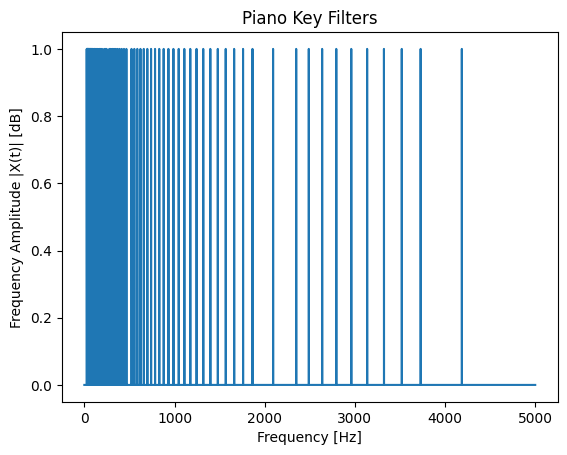

In [118]:
PIANO_KEY_FREQUENCIES = []
PIANO_FILTERS = []
if 'key_frequencies.txt' not in os.listdir():
  with open('key_frequencies.txt', 'w') as f:
    for n in range(1,89):
      freq = (2**((n-49)/12))*440
      if (n != 88):
        text = "{:.3f}\n".format(freq)
      else:
        text = "{:.3f}".format(freq)
      if text != '': f.write(text)
    f.close()

with open('key_frequencies.txt', 'r') as f:
    for n in f.read().split('\n'):
      PIANO_KEY_FREQUENCIES.append(float(n))
    
    fig, ax = plt.subplots()
    ax.set_title("Piano Key Filters")
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Frequency Amplitude |X(t)| [dB]')

    X = np.arange(0, 5000, 0.001)
    Y = np.zeros(len(X))

    seen = set()
    for k in PIANO_KEY_FREQUENCIES:
      # TODO: There is a known issue where the top 10 frequencies are not being
      # found. This is not a pressing matter because we're only using the top 69
      # keys. To see this, uncomment the line under 'except'
      try:
        i = np.where(X == k)[0][0]
      except:
        # print(f'Key frequency {k} was not found')
        pass
      if i in seen: continue
      seen.add(i)
      impluse = signal.unit_impulse(len(X), i)
      Y += impluse
    PIANO_FILTERS = Y
    plt.plot(X,Y)
f.close()

Now let's try plotting the frequency data of a sample recording. Check out the
recording below.

In [119]:
# Play the audio file
audio_path = "assets/recordings/marco_speech_18_500.wav"
display.Audio(audio_path)

Recorded with a sample rate of 48000


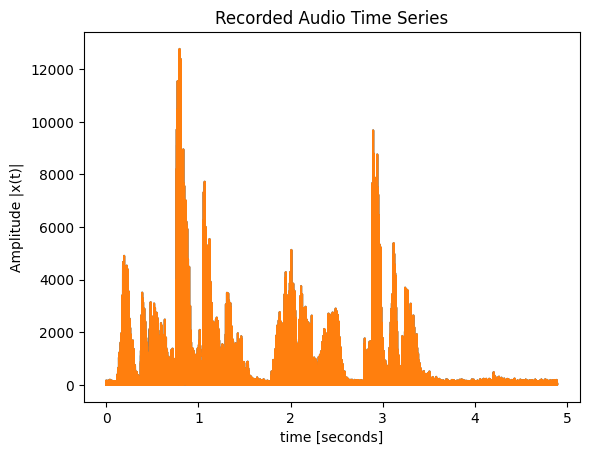

In [120]:
sample_rate, audio_time_series = wavfile.read(audio_path)
print("Recorded with a sample rate of", sample_rate)
time = np.linspace(0, len(audio_time_series) / sample_rate, num=len(audio_time_series))
plt.plot(time, np.abs(audio_time_series))
plt.title('Recorded Audio Time Series')
plt.xlabel("time [seconds]")
plt.ylabel("Amplitude |x(t)|")
plt.show()


We're interested in seeing what frequencies make up our voice. Let's see what
frequencies were used within the first **1 second**

24000 24000


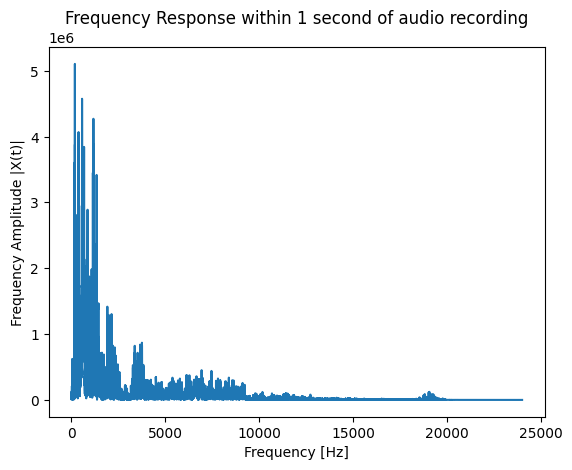

In [121]:
single_sample_data = audio_time_series[:sample_rate,0]

def fft_plot(audio, sample_rate):
  N = len(audio)    # Number of samples
  y_freq = fft(audio)
  domain = len(y_freq) // 2
  X = np.linspace(0, sample_rate//2, N//2)
  Y = np.abs(y_freq[:domain])
  plt.plot(X, Y)
  print(len(X), len(Y))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Frequency Amplitude |X(t)|")
  plt.title("Frequency Response within 1 second of audio recording")
  return plt.show()

fft_plot(single_sample_data, sample_rate)

def fft_plot_stem(audio, sample_rate):
  N = len(audio)    # Number of samples
  y_freq = fft(audio)
  freq_bins = fft.fftfreq(audio)
  domain = len(y_freq) // 2
  X = np.linspace(0, sample_rate//2, N//2)
  Y = np.abs(y_freq[:domain])
  plt.plot(X, Y)
  print(len(X), len(Y))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Frequency Amplitude |X(t)|")
  plt.title("Frequency Response within 1 second of audio recording")
  return plt.show()

This checks out with the spectral density visualization below which we got from the `audio-preview`
extension for visual studio code.

Note how the frequencies within the first second of our audio recording are most intense *below* the `5kHz` range, which matches our plot above.

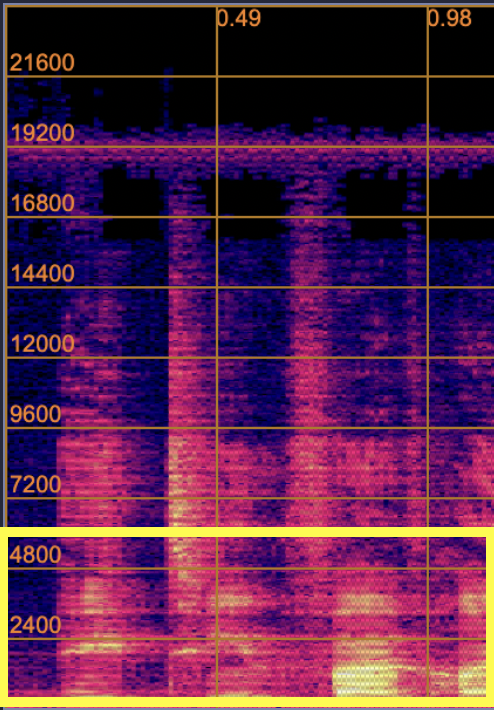

In [122]:
display.Image('assets/single_sample_spectral_analysis.png')

This spectrogram allows us to see how the frequencies in the incoming audio change with time. Instead of using a
given to us from some extension, let's make one ourselves.

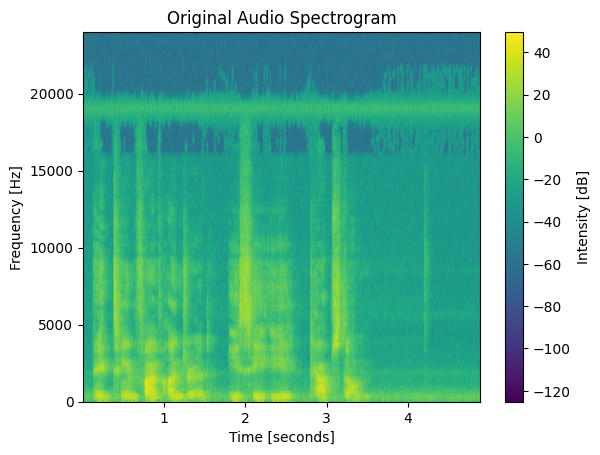

In [123]:
def make_spectrogram(audio):
  plt.specgram(audio, Fs=sample_rate)
  plt.title("Original Audio Spectrogram")
  plt.ylabel("Frequency [Hz]")
  plt.xlabel("Time [seconds]")
  cb = plt.colorbar()
  cb.set_label("Intensity [dB]")
  return plt.show()

make_spectrogram(audio_time_series[:,0])

Note that the continuous band of noise around 20Hz is likely noise introduced by
my microphone. If we continue to use the same microphone, we can most probably 
filter that noise out consistently in the future.

Let's generate another plot, this time in three dimensions, which helps us illustrate how these varying frequencies
are always present through time. The information containing in this 3D plot is can also be gathered from the spectrogram.

(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
234000


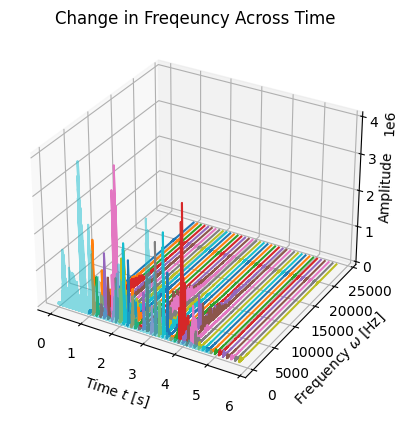

In [124]:
def freq_through_time_3d(audio, sample_rate, freq_sample_rate):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')

  # Plot Frequency Data for each second of audio
  
  N = len(audio) # Number of samples in original audio
  D = N // freq_sample_rate # Duration in seconds
  freqs = np.array([])
  for t in range(D):
    start = t*freq_sample_rate
    # 'end' grabs the fraction of samples within the last second of the original 
    # audio if the original audio is not exactly whole seconds long, i.e 5.18 
    # seconds as opposed to 5 seconds
    end = min((t+1) * freq_sample_rate, len(audio))
    audio_sample = audio[start:end,0]
    n = len(audio_sample)
    # print(n)
    freq_domain = np.linspace(0, sample_rate//2, n//2)
    frequecies = fft(audio_sample)
    print(np.shape(frequecies))
    freqs = np.append(freqs, frequecies)

    z_range = len(frequecies) // 2
    X = np.full(z_range, (t*(freq_sample_rate/sample_rate))+1)
    Y = freq_domain
    Z = np.abs(frequecies[:z_range])

    ax.plot(X, Y, Z)
  print(len(freqs))
  
  #Plot Time Data
  time = np.linspace(0, len(audio) / sample_rate, num=len(audio))
  audio_time_domain =audio[:,0]
  formated_time_domain = (10**2.5)*audio_time_domain
  ax.plot(time, np.zeros(len(audio_time_domain)), np.abs(formated_time_domain), alpha=0.5)

  # Labels
  ax.set(title="Change in Freqeuncy Across Time", xlabel=r'Time $t$ [s]', ylabel=r'Frequency $\omega$ [Hz]')
  ax.set_zlabel("Amplitude")
  ax.tick_params(axis='z', which='major', pad=-3)
  ax.zaxis.labelpad=-9

  return plt.show()

# Let's calculate frequencies for every half-second in order to get more results
# freq_through_time_3d(audio_time_series, sample_rate, sample_rate//2)
freq_through_time_3d(audio_time_series, sample_rate, sample_rate//8)

The light blue plot on the x-y plane is the time-series signal. The other 
signals along the y-z plane are the frequencies made up by the intermident 
samples from the time domain.

Remember the very first figure we looked at of all the piano note frequencies?
Here it is again, but we the frequency response we got within the first second
overlayed on top of it. Our goal is to find the right piano keys that correspond
to the frequencies observed within a given time frame. Please note, given that
the highest frequency possible with a piano is 5kHz, we'll be limiting the domain
of our frequency responses to 5kHz in the figure below.

(5000000,) (5000000,)
5104500.891046333


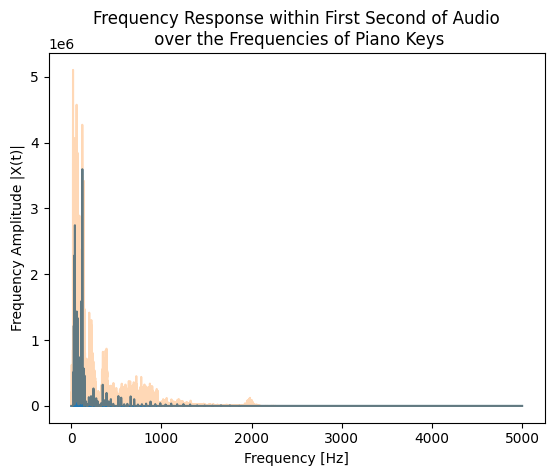

In [125]:
single_sample_data = audio_time_series[:sample_rate,0]

def rescale(arr, factor=2):
    n = len(arr)
    return np.interp(np.linspace(0, n, factor*n+1), np.arange(n), arr)

def fft_over_piano(audio, sample_rate):
  fig, ax = plt.subplots()
  N = len(audio)    # Number of samples
  y_freq = fft(audio)
  domain = len(y_freq) // 2
  Y = np.abs(y_freq[:domain])

  X = np.arange(0, 5000, 0.001)
  Y = rescale(Y, factor=int(len(X)/len(y_freq)))
  Y.resize(len(X))
  try:
    assert(len(X) == len(Y))
  except:
    print(f'len(X) = {len(X)}, len(Y) = {len(Y)}')

  print(np.shape(Y), np.shape(PIANO_FILTERS))
  ax.plot(X, np.abs(Y)*PIANO_FILTERS)
  ax.plot(X, np.abs(Y), alpha=0.3)
  print(np.max(Y))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Frequency Amplitude |X(t)|")
  plt.title("Frequency Response within First Second of Audio\n over the Frequencies of Piano Keys")
  return plt.show()

fft_over_piano(single_sample_data, sample_rate)

Our goal is to recreate the freqency signal for each sample using the discrete
points available to us with the piano keys. The resulting wave should look as
close to the original signal as possible.

We considered four options, each proposing more added benefit than the last.

The first was to filter information at the frequencies that correspond to the 
piano keys. This approach loses the most amount of data on what the original 
frequencies of a user's voice were. However, this approach offers the benefit of
 being able to be implemented in hardware since the number of filters needed 
 would be small.
 
Our second approach was to compute a moving average of all the frequencies 
before the point where a piano key lies. This improves on our initial approach 
but lacks information about the frequencies that lie after the frequency of a 
piano key.

Our third potential solution was to compute an average using the neighboring 
points before and after the frequency for our piano key. We think this is our 
best bet since this averaging technique is capable of propagating all of the 
original features from the original audio, albeit without the same resolution.

We considered a weighted neighbors average, where again we average the 
neighboring points around the frequency of a piano key but weigh each 
neighbor's contribution to the final average by their distance from the piano 
key’s frequency. Although a valid way of averaging our input, it would cause 
frequencies lying between any two piano keys to not be propagated. Therefore, 
we think that our third approach is our best attempt at propagating all the 
information regarding a user’s voice onto the piano keys.

In [126]:
def generate_windows(audio, sample_rate, play_rate):
  window_size = sample_rate // play_rate

  N = len(audio) # Number of origianl samples
  D = N // window_size # Duration

  res = np.array()

  for t in range (D):
    start = t*play_rate
    # 'end' grabs the fraction of samples within the last second of the original 
    # audio if the original audio is not exactly whole seconds long, i.e 5.18 
    # seconds as opposed to 5 seconds
    end = min((t+1) * play_rate, len(audio))
    audio_window = audio[start:end,0]
    res = np.append(res, audio_window)

  return res

In [127]:
def filter_at_piano_keys(audio, sample_rate, play_rate):
  '''
  Generates a filter array with the indicies corresponding to piano key
  frequencies, and returns the filtered result of the original frequencies
  '''

  windows = generate_windows(audio, sample_rate, play_rate)

  for window in windows:
    frequencies = fft(window)
    pass

# filter_at_piano_keys(audio_time_series, sample_rate)

In [128]:
def running_average_at_piano_keys():

  
  pass

running_average_at_piano_keys()

In [129]:
def neighbors_average():
  pass

neighbors_average()

In [130]:
def weighted_neighbors_average():
  pass

weighted_neighbors_average()